In [2]:
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import sys
from cProfile import Profile
code_path = os.path.abspath('D:/C/python_test/')

if code_path not in sys.path:
    sys.path.append(code_path)
    
from fcc_KMC_orientation import *
folder='D:/KMC/KMC-moive-crystal110/'

In [2]:
#generate lattice
def dis2_3d(a,b):
    return (b[0]-a[0])**2+(b[1]-a[1])**2+(b[2]-a[2])**2
x=3.14/2/10*1
angles=[]
for i in range(10):
    angles.append((x*i))
angle_45=45*3.14/180
rotate_110=np.matrix([[np.cos(45*3.14/180),-np.sin(45*3.14/180),0],[np.sin(angle_45),np.cos(angle_45),0],[0,0,1]])
angle1=angles[0]
angle2=angles[0]
rotate1=np.matrix([[np.cos(angle1),-np.sin(angle1),0],[np.sin(angle1),np.cos(angle1),0],[0,0,1]])
rotate2=np.matrix([[1,0,0],[0,np.cos(angle2),-np.sin(angle2)],[0,np.sin(angle2),np.cos(angle2)]])


In [4]:

size_of_lattice=(100,50,50)/np.sqrt(2)
correct=np.array([0,0,0])
boundary_x1=(size_of_lattice[0]*1/6,size_of_lattice[0]/2)
boundary_x2=(size_of_lattice[0]/2,size_of_lattice[0]*5/6)
boundary_y1=(size_of_lattice[1]*1/6,size_of_lattice[1]*5/6)
boundary_y2=(size_of_lattice[1]*1/6,size_of_lattice[1]*5/6)
boundary_z1=(size_of_lattice[2]*1/6,size_of_lattice[2]*5/6)
boundary_z2=(size_of_lattice[2]*1/6,size_of_lattice[2]*5/6)
center_1=np.asarray([(boundary_x1[0]+boundary_x1[1])/2,size_of_lattice[1]/2,size_of_lattice[2]/2])
center_2=np.asarray([(boundary_x2[0]+boundary_x2[1])/2,size_of_lattice[1]/2,size_of_lattice[2]/2])

lattice_=[]
number=0
size_of_lattice=(100,50,50)
for i in range(0,int(size_of_lattice[0]/2)):
    for j in range(0,size_of_lattice[1]):
        for k in range(0,size_of_lattice[2]):
            m1=np.asarray([i/np.sqrt(2),j/np.sqrt(2),k])-center_1;m2=m1+np.asarray([np.sqrt(2)/4,np.sqrt(2)/4,1/2])
            m1=np.squeeze(np.asarray(m1*rotate1+center_1));m2=np.squeeze(np.asarray(m2*rotate1+center_1));
            if(m1[0]>=boundary_x1[0] and m1[0]<boundary_x1[1] and m1[1]>=boundary_y1[0] and m1[1]<boundary_y1[1] and m1[2]>=boundary_z1[0] and m1[2]<boundary_z1[1]):
                lattice_.append(lattice_site(0,np.squeeze(m1).tolist()));
            if(m2[0]>=boundary_x1[0] and m2[0]<boundary_x1[1] and m2[1]>=boundary_y1[0] and m2[1]<boundary_y1[1] and m2[2]>=boundary_z1[0] and m2[2]<boundary_z1[1]):
                lattice_.append(lattice_site(0,np.squeeze(m2).tolist()))

for i in range(int(size_of_lattice[0]/2),size_of_lattice[0]):
    for j in range(0,size_of_lattice[1]):
        for k in range(0,size_of_lattice[2]):
            m1=np.asarray([i/np.sqrt(2),j/np.sqrt(2),k])-center_1;m2=m1+np.asarray([np.sqrt(2)/4,np.sqrt(2)/4,1/2])
            m1=np.squeeze(np.asarray(m1*rotate2+center_1));m2=np.squeeze(np.asarray(m2*rotate2+center_1));
            if(m1[0]>=boundary_x2[0] and m1[0]<boundary_x2[1] and m1[1]>=boundary_y2[0] and m1[1]<boundary_y2[1] and m1[2]>=boundary_z2[0] and m1[2]<boundary_z2[1]):
                lattice_.append(lattice_site(0,np.squeeze(m1).tolist()));
            if(m2[0]>=boundary_x2[0] and m2[0]<boundary_x2[1] and m2[1]>=boundary_y2[0] and m2[1]<boundary_y2[1] and m2[2]>=boundary_z2[0] and m2[2]<boundary_z2[1]):
                lattice_.append(lattice_site(0,np.squeeze(m2).tolist()))
# #save
# position=[];occupy=[]
# for i in lattice_:
#     position.append([i.position[0]*10,i.position[1]*10,i.position[2]*10])
#     occupy.append(i.occupy)
# a=pd.DataFrame(position)
# a.insert(loc=0,column='a',value=['pd' if i==1 else 'Pd' for i in occupy ])
# a.columns=[len(lattice_)-1,'','','']
# a.iloc[0,:]=['atoms','','','']
# a.to_csv('D:/KMC/atoms.xyz',index=False,sep=' ')

In [5]:
#binning
bin_size=20
step_of_bin=((boundary_x2[1]-boundary_x1[0])/bin_size,(boundary_y1[1]-boundary_y1[0])/bin_size,(boundary_z1[1]-boundary_z1[0])/bin_size)
lattice_bin=[[[[] for i in range(bin_size)] for i in range(bin_size)] for i in range(bin_size)]
bin_x=[boundary_x1[0]+step_of_bin[0]*i for i in range(bin_size+1)]
bin_y=[boundary_y1[0]+step_of_bin[1]*i for i in range(bin_size+1)]
bin_z=[boundary_z1[0]+step_of_bin[2]*i for i in range(bin_size+1)]
for i in tqdm(lattice_):
    x=False
    for j0,j in enumerate(bin_x):
        for k0,k in enumerate(bin_y):
            for l0,l in enumerate(bin_z):
                if i.position[0]<j and i.position[1]<k and i.position[2]<l:
                    lattice_bin[j0-1][k0-1][l0-1].append(i);x=True
                if x:break
            if x:break
        if x:break
    if x:continue
for i in lattice_bin:
    for j in i:
        for k in j:
            for l in k:
                l.number=number
                number=number+1

100%|█████████████████████████████████████████████████████████████████████████| 104676/104676 [01:55<00:00, 905.20it/s]


In [6]:
#intialize neighbor list
rmax=0.9
for i in tqdm(range(bin_size)):
    for j in range(bin_size):
        for l in range(bin_size):
            for k in lattice_bin[i][j][l]:
                for s in range(i-1,i+2):
                    for m in range(j-1,j+2):
                        for n in range(l-1,l+2):
                            if s<0 or m<0 or n<0 or s>bin_size-1 or m>bin_size-1 or n>bin_size-1:continue;
                            k.neighborlist_init(lattice_bin[s][m][n],rmax)


#flatten lattice_bin into lattice
lattice=[]

for i in range(bin_size):
    for j in range(bin_size):
        for l in range(bin_size):
            for k in lattice_bin[i][j][l]:
                k.full_neighbor=len(k.neighbor_list)
                lattice.append(k)

for i in lattice:
    i.position[0]-=size_of_lattice[0]/2/np.sqrt(2)
    i.position[1]-=size_of_lattice[1]/2/np.sqrt(2)
    i.position[2]-=size_of_lattice[2]/2/np.sqrt(2)
#     i.position[0]*=3.859
#     i.position[1]*=3.859
#     i.position[2]*=3.859
print(len(lattice))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:27<00:00,  4.35s/it]


104676


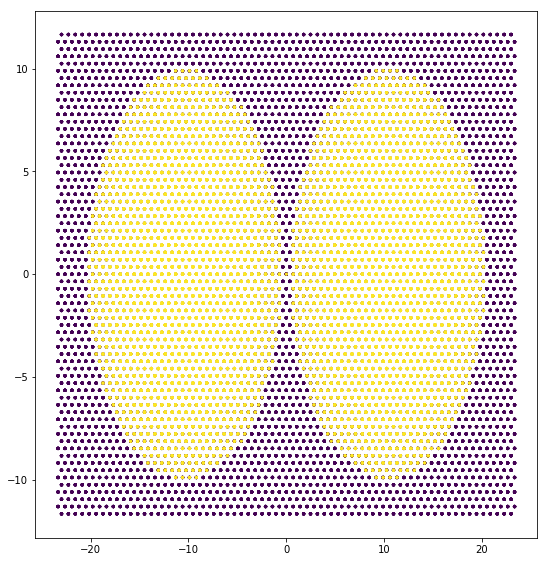

In [7]:
#build a single sphere
r=10
for i in lattice:
    if (i.position[0]-(r+0.4))**2+(i.position[1])**2+(i.position[2])**2<r**2:i.occupy=1
    elif (i.position[0]+(r+0.4))**2+(i.position[1])**2+(i.position[2])**2<r**2:i.occupy=1
    elif i.position[0]**2+i.position[1]**2+i.position[2]**2<0.2:i.occupy=1
    else:i.occupy=0

#box with r=r
# r=6
# for i in lattice:
#     if (i.position[0])<r and (i.position[1])<r and (i.position[2])<r and (i.position[0])>-r and (i.position[1])>-r and (i.position[2])>-r:i.occupy=1
# #     elif (i.position[0]+3)**2+(i.position[1])**2+(i.position[2])**2<3**2:i.occupy=1
#     else:i.occupy=0

#plot
a=[]
for k in lattice:
    if k.position[2]<=0.5:a.append([k.position[0],k.position[1],k.occupy])
a=np.array(a)
plt.figure(figsize=(9,9.7))
plt.scatter(a[:,0],a[:,1],c=a[:,2],s=5)

#renew neighbor_number
for i in lattice:
    m=0
    for j in i.neighbor_list:
        if lattice[j].occupy==1:m=m+1
    i.neighbor=m



[23.33452377915608, 11.667261889578036, 11.322330470336315] [-23.334523779156065, -11.667261889578032, -11.677669529663685]


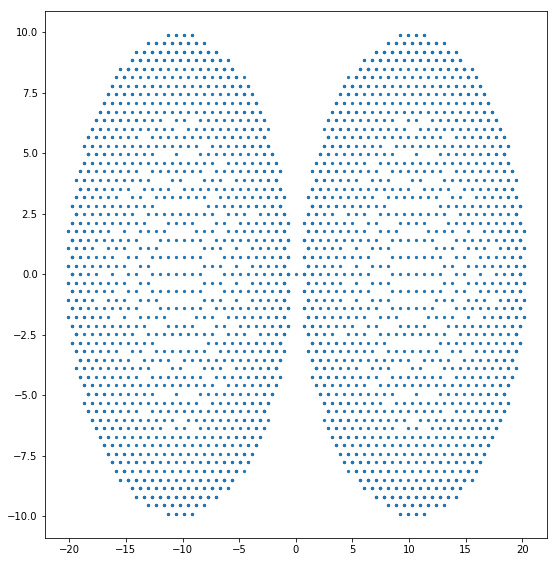

In [8]:
#kMC framework
bond_energy=0.1;Kb=8.617e-5;T=400;v=10**13/500*T
rate_list=[]
def rate(bond):
    return v*np.exp(-bond_energy*bond/Kb/T)
for i in range(12):
    rate_list.append(rate(i))

def change_rate(lst,elmt,rate):
    for i,j in enumerate(lst):
        if j[0]==elmt:lst[i][1]=rate;break
#calculate surface=[surface atom number,rate] and R_sum         
rate_sum=0
surface=[]
for i in lattice:
    if i.neighbor!=i.full_neighbor and i.occupy==1:
        m=rate_list[i.neighbor]
        surface.append([i.number,m])
        rate_sum=rate_sum+m
surface=dict(surface)
#plot
a=[]
for k in surface:
    if lattice[k].position[2]<0.5:
        a.append([lattice[k].position[0],lattice[k].position[1],lattice[k].position[2]])
a=np.array(a)
plt.figure(figsize=(9,9.7))
plt.scatter(a[:,0],a[:,1],s=5)
#boundary

max=[0,0,0];min=[0,0,0]
for i in lattice:
    if i.position[0]>max[0]:max[0]= i.position[0];
    if i.position[1]>max[1]:max[1]= i.position[1];
    if i.position[2]>max[2]:max[2]= i.position[2];
    if i.position[0]<min[0]:min[0]= i.position[0];
    if i.position[1]<min[1]:min[1]= i.position[1];
    if i.position[2]<min[2]:min[2]= i.position[2];
print(max,min)
forbidden=np.array(max)*0.9
r_list=dict()
time=0
def get_r(n):
    Va=0.7071*1/3.14;
    V=Va*n*3.859*3.859
    return np.sqrt(V)
lattice_center=[]
for k in lattice:
    if abs(k.position[0])<0.150:
        lattice_center.append(k.number)

In [9]:
#start
nn=0
cycle=2*10**7
plt.ioff()
lose=0
r1=r*3.859
xx=set(np.unique(np.logspace(0,np.log10(cycle),2000).astype(int)))
try:
    with tqdm(range(cycle)) as t:
        for i in t:
            if i in xx:
                m=0
                for k in lattice_center:
                    if lattice[k].occupy==1:
                        m+=1
                r_list[time]=get_r(m)/r1
#             if i%(cycle/125)==0:
#                 xy=[]
#                 for j in lattice:
#                     if j.occupy==1:
#                         xy.append([j.position[0],(j.position[2]+j.position[1])/1.732])
#                 xy=np.array(xy)
#                 plt.figure()
#                 plt.figure(figsize=(15,10))
#                 plt.xlim((-20,20))
#                 plt.ylim((-10,10))
#                 plt.scatter(xy[:,0],xy[:,1],s=100)
#                 plt.savefig('D:/KMC/'+str(np.round(time,6))+'.tif')
#                 plt.close()
            if i%(cycle/200)==0:
        # #######save lattice
                print(time)
                position=[];occupy=[]
                surface_=[]
                for j in surface:
                    surface_.append(j)
                length=0
                for j in lattice:
                    if j.occupy==0:continue;
                    length+=1
                    position.append([j.position[0]*3,j.position[1]*3,j.position[2]*3])
                    if j.occupy==0:occupy.append('Si')
                    elif j.neighbor==0:occupy.append('Au');print (j.number)
                    elif j.number in surface_:occupy.append('Pd')
                    else:occupy.append('C')
                a=pd.DataFrame(position)
                a.insert(loc=0,column='a',value=occupy)
                a.columns=[length-1,'','','']
                a.iloc[0,:]=['atoms','','','']
#                 a.to_csv('D:/KMC/atoms'+str(np.round(time,6))+'.xyz',index=False,sep=' ')
                a.to_csv(folder+str(nn)+'.xyz',index=False,sep=' ')
                nn+=1
                b=[]
                for i in r_list:
                    b.append([i,r_list[i]])
                b=pd.DataFrame(b)
                b.to_csv(folder+'time-neck.txt',sep=',')
#             #plot
#                 a=[]
#                 for k in lattice:
#                     if abs(k.position[0])<2 and k.occupy==1:
#                         a.append([k.position[1],k.position[2]])
#                 a=np.array(a)
#                 plt.figure(figsize=(9,9.7))
#                 plt.scatter(a[:,0],a[:,1],s=5)
#                 plt.savefig('D:/KMC/'+str(int(i*100/(cycle)))+'.tif')
#                 plt.close()
        # ########

            try:
                hopping_atom,time=slct(surface,time,rd.random())
                free_hopping(lattice,surface,hopping_atom)
            except:
                continue;
except KeyboardInterrupt:
    t.close()
    raise
t.close()

  0%|                                                                                     | 0/20000000 [00:00<?, ?it/s]

0


  0%|▎                                                                    | 99988/20000000 [00:32<1:48:38, 3052.90it/s]

4.44258694187738e-05


  1%|▋                                                                   | 199773/20000000 [01:05<1:48:17, 3047.44it/s]

9.065211634151638e-05


  1%|█                                                                   | 299709/20000000 [01:38<1:47:53, 3043.24it/s]

0.0001341220922768116


  2%|█▎                                                                  | 399973/20000000 [02:11<1:47:04, 3050.98it/s]

0.00017827743431553245


  2%|█▋                                                                  | 499817/20000000 [02:43<1:46:22, 3055.25it/s]

0.00022191985044628382


  3%|██                                                                  | 599931/20000000 [03:16<1:45:50, 3055.06it/s]

0.0002663798222783953


  3%|██▍                                                                 | 699829/20000000 [03:48<1:45:13, 3056.91it/s]

0.0003129887627437711


  4%|██▋                                                                 | 799937/20000000 [04:21<1:44:28, 3062.92it/s]

0.00035735449637286365


  4%|███                                                                 | 899817/20000000 [04:52<1:43:22, 3079.51it/s]

0.00040185957914218307


  5%|███▍                                                                | 999706/20000000 [05:23<1:42:23, 3092.88it/s]

0.0004465016536414623


  5%|███▋                                                               | 1099812/20000000 [05:53<1:41:23, 3106.90it/s]

0.0004880460328422487


  6%|████                                                               | 1199963/20000000 [06:24<1:40:26, 3119.72it/s]

0.0005345835234038532


  6%|████▎                                                              | 1299788/20000000 [06:55<1:39:35, 3129.67it/s]

0.0005803038948215544


  7%|████▋                                                              | 1399963/20000000 [07:25<1:38:45, 3139.23it/s]

0.0006254765903577209


  7%|█████                                                              | 1499671/20000000 [07:56<1:37:58, 3147.23it/s]

0.0006698243669234216


  8%|█████▎                                                             | 1599995/20000000 [08:27<1:37:16, 3152.83it/s]

0.0007121231174096465


  8%|█████▋                                                             | 1699710/20000000 [08:57<1:36:32, 3159.53it/s]

0.0007574055343866348


  9%|██████                                                             | 1799785/20000000 [09:28<1:35:52, 3164.01it/s]

0.0008022351539693773


  9%|██████▎                                                            | 1899819/20000000 [09:59<1:35:13, 3168.05it/s]

0.0008458940428681672


 10%|██████▋                                                            | 1999659/20000000 [10:30<1:34:34, 3171.88it/s]

0.0008879784145392478


 10%|███████                                                            | 2099715/20000000 [11:01<1:33:57, 3175.09it/s]

0.0009326360304839909


 11%|███████▎                                                           | 2199656/20000000 [11:32<1:33:20, 3178.51it/s]

0.0009742148104123771


 11%|███████▋                                                           | 2299687/20000000 [12:02<1:32:43, 3181.42it/s]

0.0010155384661629796


 12%|████████                                                           | 2399945/20000000 [12:33<1:32:06, 3184.39it/s]

0.0010609215823933482


 12%|████████▎                                                          | 2499855/20000000 [13:04<1:31:30, 3187.13it/s]

0.0011068839812651277


 13%|████████▋                                                          | 2599976/20000000 [13:35<1:30:55, 3189.54it/s]

0.0011498968815430999


 13%|█████████                                                          | 2699847/20000000 [14:05<1:30:20, 3191.78it/s]

0.0011941068805754185


 14%|█████████▍                                                         | 2799906/20000000 [14:36<1:29:45, 3194.06it/s]

0.0012385213049128652


 14%|█████████▋                                                         | 2899681/20000000 [15:07<1:29:10, 3196.22it/s]

0.0012824429431930184


 15%|██████████                                                         | 2999676/20000000 [15:37<1:28:34, 3198.66it/s]

0.001325598219409585


 15%|██████████▍                                                        | 3099999/20000000 [16:08<1:28:00, 3200.30it/s]

0.001369019504636526


 16%|██████████▋                                                        | 3199783/20000000 [16:39<1:27:26, 3202.17it/s]

0.0014135336969047785


 16%|███████████                                                        | 3299950/20000000 [17:10<1:26:52, 3203.60it/s]

0.0014567349571734667


 17%|███████████▍                                                       | 3399699/20000000 [17:40<1:26:19, 3205.21it/s]

0.0015010918723419309


 17%|███████████▋                                                       | 3499897/20000000 [18:11<1:25:45, 3206.42it/s]

0.0015449130441993475


 18%|████████████                                                       | 3599860/20000000 [18:42<1:25:12, 3207.80it/s]

0.00158796610776335


 18%|████████████▍                                                      | 3699940/20000000 [19:13<1:24:39, 3208.88it/s]

0.0016310004284605384


 19%|████████████▋                                                      | 3799764/20000000 [19:43<1:24:07, 3209.73it/s]

0.0016740524442866445


 19%|█████████████                                                      | 3899855/20000000 [20:14<1:23:34, 3210.72it/s]

0.001717915409244597


 20%|█████████████▍                                                     | 3999804/20000000 [20:45<1:23:01, 3212.00it/s]

0.0017614320386201143


 20%|█████████████▋                                                     | 4099957/20000000 [21:15<1:22:28, 3213.24it/s]

0.0018073588144034147


 21%|██████████████                                                     | 4199930/20000000 [21:46<1:21:55, 3214.42it/s]

0.0018513238755986094


 21%|██████████████▍                                                    | 4299868/20000000 [22:17<1:21:22, 3215.60it/s]

0.0018942860187962651


 22%|██████████████▋                                                    | 4399728/20000000 [22:48<1:20:50, 3216.17it/s]

0.001937967725098133


 22%|███████████████                                                    | 4499911/20000000 [23:18<1:20:18, 3216.93it/s]

0.0019809622317552567


 23%|███████████████▍                                                   | 4599816/20000000 [23:49<1:19:46, 3217.58it/s]

0.002022836823016405


 23%|███████████████▋                                                   | 4699733/20000000 [24:20<1:19:14, 3218.33it/s]

0.002067896071821451


 24%|████████████████                                                   | 4799923/20000000 [24:51<1:18:41, 3219.13it/s]

0.0021139655727893114


 24%|████████████████▍                                                  | 4899776/20000000 [25:22<1:18:11, 3218.60it/s]

0.0021574641577899456


 25%|████████████████▋                                                  | 4999838/20000000 [25:53<1:17:39, 3219.19it/s]

0.002200531540438533


 25%|█████████████████                                                  | 5099962/20000000 [26:24<1:17:09, 3218.44it/s]

0.0022431490942835808


 26%|█████████████████▍                                                 | 5199964/20000000 [26:56<1:16:39, 3217.58it/s]

0.0022876826114952564


 26%|█████████████████▊                                                 | 5299849/20000000 [27:30<1:16:16, 3211.91it/s]

0.002330474555492401


 27%|██████████████████                                                 | 5399787/20000000 [28:03<1:15:52, 3206.84it/s]

0.0023763945791870356


 27%|██████████████████▍                                                | 5499949/20000000 [28:38<1:15:31, 3199.68it/s]

0.0024203392677009106


 28%|██████████████████▊                                                | 5599659/20000000 [29:11<1:15:04, 3197.04it/s]

0.0024619854521006346


 28%|███████████████████                                                | 5699915/20000000 [29:44<1:14:38, 3193.40it/s]

0.0025070691481232643


 29%|███████████████████▍                                               | 5799851/20000000 [30:18<1:14:11, 3190.02it/s]

0.0025508785620331764


 29%|███████████████████▊                                               | 5899912/20000000 [30:51<1:13:44, 3186.54it/s]

0.0025955638848245144


 30%|████████████████████                                               | 5999764/20000000 [31:24<1:13:18, 3183.31it/s]

0.0026393155567348003


 30%|████████████████████▍                                              | 6099867/20000000 [31:58<1:12:50, 3180.27it/s]

0.0026830972637981176


 31%|████████████████████▊                                              | 6199972/20000000 [32:31<1:12:23, 3176.89it/s]

0.002726486651226878


 31%|█████████████████████                                              | 6299662/20000000 [33:05<1:11:57, 3173.57it/s]

0.002770512131974101


 32%|█████████████████████▍                                             | 6399764/20000000 [33:38<1:11:29, 3170.66it/s]

0.002815740881487727


 32%|█████████████████████▊                                             | 6499906/20000000 [34:11<1:11:01, 3167.61it/s]

0.002860170556232333


 33%|██████████████████████                                             | 6599956/20000000 [34:44<1:10:32, 3165.95it/s]

0.002903721760958433


 33%|██████████████████████▍                                            | 6699974/20000000 [35:20<1:10:08, 3160.24it/s]

0.0029455358162522316


 34%|██████████████████████▊                                            | 6799690/20000000 [35:54<1:09:42, 3156.38it/s]

0.0029902849346399307


 34%|███████████████████████                                            | 6899835/20000000 [36:29<1:09:16, 3151.66it/s]

0.0030339593067765236


 35%|███████████████████████▍                                           | 6999764/20000000 [37:04<1:08:50, 3147.32it/s]

0.0030775072518736124


 35%|███████████████████████▊                                           | 7099767/20000000 [37:38<1:08:24, 3142.95it/s]

0.0031233024783432484


 36%|████████████████████████                                           | 7199880/20000000 [38:13<1:07:57, 3139.35it/s]

0.003165437374264002


 36%|████████████████████████▍                                          | 7299998/20000000 [38:47<1:07:29, 3136.32it/s]

0.003211203496903181


 37%|████████████████████████▊                                          | 7399675/20000000 [39:21<1:07:00, 3133.75it/s]

0.00325553840957582


 37%|█████████████████████████                                          | 7499757/20000000 [39:56<1:06:33, 3129.99it/s]

0.0033006230369210243


 38%|█████████████████████████▍                                         | 7599707/20000000 [40:30<1:06:05, 3127.32it/s]

0.0033464774023741484


 38%|█████████████████████████▊                                         | 7699836/20000000 [41:04<1:05:36, 3124.78it/s]

0.0033922172151505947


 39%|██████████████████████████▏                                        | 7799951/20000000 [41:38<1:05:07, 3121.92it/s]

0.0034369928762316704


 39%|██████████████████████████▍                                        | 7899747/20000000 [42:11<1:04:37, 3120.24it/s]

0.00348154385574162


 40%|██████████████████████████▊                                        | 7999891/20000000 [42:44<1:04:06, 3119.65it/s]

0.003525315085425973


 40%|███████████████████████████▏                                       | 8099881/20000000 [43:17<1:03:36, 3118.39it/s]

0.0035687109921127558


 41%|███████████████████████████▍                                       | 8199940/20000000 [43:50<1:03:05, 3117.21it/s]

0.0036148291546851397


 41%|███████████████████████████▊                                       | 8299681/20000000 [44:22<1:02:34, 3116.73it/s]

0.0036620686296373606


 42%|████████████████████████████▏                                      | 8399767/20000000 [44:55<1:02:02, 3116.32it/s]

0.003707469906657934


 42%|████████████████████████████▍                                      | 8499658/20000000 [45:27<1:01:30, 3115.91it/s]

0.0037530988920480013


 43%|████████████████████████████▊                                      | 8599738/20000000 [46:00<1:00:59, 3115.46it/s]

0.00379704381339252


 43%|█████████████████████████████▏                                     | 8699860/20000000 [46:33<1:00:27, 3114.73it/s]

0.003844441380351782


 44%|██████████████████████████████▎                                      | 8799974/20000000 [47:05<59:56, 3114.33it/s]

0.003890739055350423


 44%|██████████████████████████████▋                                      | 8899807/20000000 [47:38<59:24, 3113.69it/s]

0.003935815766453743


 45%|███████████████████████████████                                      | 8999812/20000000 [48:10<58:53, 3113.17it/s]

0.003979349508881569


 45%|███████████████████████████████▍                                     | 9099850/20000000 [48:43<58:21, 3112.65it/s]

0.004023516084998846


 46%|███████████████████████████████▋                                     | 9199648/20000000 [49:16<57:51, 3111.36it/s]

0.0040679024532437325


 46%|████████████████████████████████                                     | 9299711/20000000 [49:50<57:20, 3110.21it/s]

0.0041137277148664


 47%|████████████████████████████████▍                                    | 9399886/20000000 [50:23<56:50, 3108.51it/s]

0.004157763905823231


 47%|████████████████████████████████▊                                    | 9499906/20000000 [50:57<56:19, 3107.05it/s]

0.004200836643576622


 48%|█████████████████████████████████                                    | 9599766/20000000 [51:32<55:49, 3104.70it/s]

0.0042456672526896


 48%|█████████████████████████████████▍                                   | 9699817/20000000 [52:05<55:19, 3103.03it/s]

0.00428713159635663


 49%|█████████████████████████████████▊                                   | 9799831/20000000 [52:39<54:48, 3101.69it/s]

0.00433008698746562


 49%|██████████████████████████████████▏                                  | 9899863/20000000 [53:12<54:17, 3100.62it/s]

0.004373893607407808


 50%|██████████████████████████████████▍                                  | 9999771/20000000 [53:46<53:46, 3099.11it/s]

0.004414057359099388


 50%|██████████████████████████████████▎                                 | 10099893/20000000 [54:20<53:16, 3097.55it/s]

0.004456840921193361


 51%|██████████████████████████████████▋                                 | 10199916/20000000 [54:54<52:45, 3096.12it/s]

0.0045006354339420795


 51%|███████████████████████████████████                                 | 10299737/20000000 [55:28<52:14, 3094.82it/s]

0.00454663997516036


 52%|███████████████████████████████████▎                                | 10399895/20000000 [56:01<51:42, 3093.86it/s]

0.004591065458953381


 52%|███████████████████████████████████▋                                | 10499728/20000000 [56:35<51:12, 3092.46it/s]

0.004634171258658171


 53%|████████████████████████████████████                                | 10599903/20000000 [57:09<50:41, 3091.07it/s]

0.004677290562540293


 53%|████████████████████████████████████▍                               | 10699837/20000000 [57:42<50:09, 3089.85it/s]

0.004720361437648535


 54%|████████████████████████████████████▋                               | 10799947/20000000 [58:16<49:38, 3088.56it/s]

0.004763607867062092


 54%|█████████████████████████████████████                               | 10899915/20000000 [58:50<49:07, 3087.29it/s]

0.004807456862181425


 55%|█████████████████████████████████████▍                              | 10999749/20000000 [59:23<48:35, 3086.99it/s]

0.004849992226809263


 55%|█████████████████████████████████████▋                              | 11099880/20000000 [59:57<48:04, 3085.86it/s]

0.004892837256193161


 56%|████████████████████████████████████▉                             | 11199729/20000000 [1:00:30<47:32, 3084.71it/s]

0.004935810808092356


 56%|█████████████████████████████████████▎                            | 11299886/20000000 [1:01:04<47:01, 3083.49it/s]

0.004979664459824562


 57%|█████████████████████████████████████▌                            | 11399744/20000000 [1:01:38<46:30, 3082.44it/s]

0.005024830345064402


 57%|█████████████████████████████████████▉                            | 11499898/20000000 [1:02:13<45:59, 3080.19it/s]

0.005069748964160681


 58%|██████████████████████████████████████▎                           | 11599887/20000000 [1:02:48<45:29, 3078.04it/s]

0.0051119145937263966


 58%|██████████████████████████████████████▌                           | 11699715/20000000 [1:03:23<44:58, 3076.14it/s]

0.00515301339328289


 59%|██████████████████████████████████████▉                           | 11799692/20000000 [1:03:58<44:27, 3074.37it/s]

0.005197346676141024


 59%|███████████████████████████████████████▎                          | 11899977/20000000 [1:04:32<43:56, 3072.59it/s]

0.005241215694695711


 60%|███████████████████████████████████████▌                          | 11999880/20000000 [1:05:07<43:24, 3071.18it/s]

0.005286484956741333


 60%|███████████████████████████████████████▉                          | 12099930/20000000 [1:05:41<42:53, 3069.70it/s]

0.005330279469490051


 61%|████████████████████████████████████████▎                         | 12199881/20000000 [1:06:16<42:22, 3068.15it/s]

0.005372073035687208


 61%|████████████████████████████████████████▌                         | 12299762/20000000 [1:06:51<41:51, 3066.12it/s]

0.005414367653429508


 62%|████████████████████████████████████████▉                         | 12399701/20000000 [1:07:25<41:19, 3065.08it/s]

0.005457181949168444


 62%|█████████████████████████████████████████▏                        | 12499685/20000000 [1:08:00<40:48, 3063.12it/s]

0.005500325467437506


 63%|█████████████████████████████████████████▌                        | 12599993/20000000 [1:08:34<40:16, 3062.26it/s]

0.005544022191315889


 63%|█████████████████████████████████████████▉                        | 12699887/20000000 [1:09:08<39:44, 3061.54it/s]

0.005585200153291225


 64%|██████████████████████████████████████████▏                       | 12799811/20000000 [1:09:42<39:12, 3060.62it/s]

0.005628064274787903


 64%|██████████████████████████████████████████▌                       | 12899835/20000000 [1:10:16<38:40, 3059.61it/s]

0.005668632686138153


 65%|██████████████████████████████████████████▉                       | 12999748/20000000 [1:10:49<38:08, 3059.02it/s]

0.00571031216531992


 65%|███████████████████████████████████████████▏                      | 13099974/20000000 [1:11:23<37:36, 3058.51it/s]

0.005752495490014553


 66%|███████████████████████████████████████████▌                      | 13199961/20000000 [1:11:56<37:03, 3057.81it/s]

0.005794838536530733


 66%|███████████████████████████████████████████▉                      | 13300000/20000000 [1:12:30<36:31, 3057.25it/s]

0.005837851669639349


 67%|████████████████████████████████████████████▏                     | 13399977/20000000 [1:13:03<35:59, 3056.74it/s]

0.005882209166884422


 67%|████████████████████████████████████████████▌                     | 13499721/20000000 [1:13:37<35:26, 3056.17it/s]

0.005927216727286577


 68%|████████████████████████████████████████████▉                     | 13599702/20000000 [1:14:10<34:54, 3055.86it/s]

0.005969753954559565


 68%|█████████████████████████████████████████████▏                    | 13699780/20000000 [1:14:43<34:21, 3055.53it/s]

0.006013986188918352


 69%|█████████████████████████████████████████████▌                    | 13799762/20000000 [1:15:16<33:49, 3055.10it/s]

0.006056886166334152


 69%|█████████████████████████████████████████████▊                    | 13899889/20000000 [1:15:50<33:16, 3054.76it/s]

0.0061000012792646885


 70%|██████████████████████████████████████████████▏                   | 13999689/20000000 [1:16:23<32:44, 3054.32it/s]

0.00614330405369401


 70%|██████████████████████████████████████████████▌                   | 14099788/20000000 [1:16:56<32:12, 3053.90it/s]

0.0061852699145674706


 71%|██████████████████████████████████████████████▊                   | 14199801/20000000 [1:17:30<31:39, 3053.49it/s]

0.00622874591499567


 71%|███████████████████████████████████████████████▏                  | 14299967/20000000 [1:18:03<31:07, 3052.96it/s]

0.006272830069065094


 72%|███████████████████████████████████████████████▌                  | 14399839/20000000 [1:18:37<30:34, 3052.46it/s]

0.006312941201031208


 72%|███████████████████████████████████████████████▊                  | 14499996/20000000 [1:19:10<30:02, 3052.01it/s]

0.006355670280754566


 73%|████████████████████████████████████████████████▏                 | 14599881/20000000 [1:19:44<29:29, 3051.52it/s]

0.006398681551218033


 73%|████████████████████████████████████████████████▌                 | 14699750/20000000 [1:20:17<28:57, 3051.16it/s]

0.0064385985024273396


 74%|████████████████████████████████████████████████▊                 | 14799772/20000000 [1:20:51<28:24, 3050.81it/s]

0.006479378789663315


 74%|█████████████████████████████████████████████████▏                | 14899849/20000000 [1:21:24<27:51, 3050.50it/s]

0.006522002629935741


 75%|█████████████████████████████████████████████████▍                | 14999935/20000000 [1:21:57<27:19, 3050.08it/s]

0.0065622227266430855


 75%|█████████████████████████████████████████████████▊                | 15099858/20000000 [1:22:30<26:46, 3049.87it/s]

0.0066021704114973545


 76%|██████████████████████████████████████████████████▏               | 15199976/20000000 [1:23:04<26:14, 3049.50it/s]

0.006644037552177906


 76%|██████████████████████████████████████████████████▍               | 15299976/20000000 [1:23:37<25:41, 3049.17it/s]

0.0066865417174994946


 77%|██████████████████████████████████████████████████▊               | 15399846/20000000 [1:24:11<25:08, 3048.85it/s]

0.006731674075126648


 77%|███████████████████████████████████████████████████▏              | 15499700/20000000 [1:24:44<24:36, 3048.47it/s]

0.006774934008717537


 78%|███████████████████████████████████████████████████▍              | 15599738/20000000 [1:25:17<24:03, 3048.10it/s]

0.006818628404289484


 78%|███████████████████████████████████████████████████▊              | 15699950/20000000 [1:25:51<23:30, 3047.82it/s]

0.00686445040628314


 79%|████████████████████████████████████████████████████▏             | 15799714/20000000 [1:26:24<22:58, 3047.59it/s]

0.006908055394887924


 79%|████████████████████████████████████████████████████▍             | 15899865/20000000 [1:26:59<22:25, 3046.38it/s]

0.006950085517019033


 80%|████████████████████████████████████████████████████▊             | 15999799/20000000 [1:27:33<21:53, 3045.28it/s]

0.006993204355239868


 80%|█████████████████████████████████████████████████████▏            | 16099899/20000000 [1:28:07<21:20, 3044.93it/s]

0.007039010990411043


 81%|█████████████████████████████████████████████████████▍            | 16199896/20000000 [1:28:39<20:47, 3045.17it/s]

0.007087634410709143


 81%|█████████████████████████████████████████████████████▊            | 16299665/20000000 [1:29:09<20:14, 3046.71it/s]

0.007132739759981632


 82%|██████████████████████████████████████████████████████            | 16399949/20000000 [1:29:39<19:40, 3048.39it/s]

0.007177087944000959


 82%|██████████████████████████████████████████████████████▍           | 16499982/20000000 [1:30:09<19:07, 3050.06it/s]

0.007220778614282608


 83%|██████████████████████████████████████████████████████▊           | 16599754/20000000 [1:30:39<18:34, 3051.76it/s]

0.007266768254339695


 83%|███████████████████████████████████████████████████████           | 16699922/20000000 [1:31:09<18:00, 3053.42it/s]

0.00731031084433198


 84%|███████████████████████████████████████████████████████▍          | 16799676/20000000 [1:31:39<17:27, 3054.99it/s]

0.0073540713638067245


 84%|███████████████████████████████████████████████████████▊          | 16899871/20000000 [1:32:09<16:54, 3056.55it/s]

0.00739592919126153


 85%|████████████████████████████████████████████████████████          | 16999652/20000000 [1:32:39<16:21, 3057.94it/s]

0.00744051905348897


 85%|████████████████████████████████████████████████████████▍         | 17099908/20000000 [1:33:09<15:47, 3059.31it/s]

0.00748416455462575


 86%|████████████████████████████████████████████████████████▊         | 17199936/20000000 [1:33:39<15:14, 3060.56it/s]

0.00753097515553236


 86%|█████████████████████████████████████████████████████████         | 17299675/20000000 [1:34:09<14:41, 3061.92it/s]

0.007573330774903297


 87%|█████████████████████████████████████████████████████████▍        | 17399834/20000000 [1:34:40<14:08, 3063.33it/s]

0.007614051457494497


 87%|█████████████████████████████████████████████████████████▋        | 17499913/20000000 [1:35:10<13:35, 3064.66it/s]

0.007659817114472389


 88%|██████████████████████████████████████████████████████████        | 17599656/20000000 [1:35:40<13:02, 3066.03it/s]

0.007701674941927195


 88%|██████████████████████████████████████████████████████████▍       | 17699743/20000000 [1:36:10<12:29, 3067.35it/s]

0.007746114395558834


 89%|██████████████████████████████████████████████████████████▋       | 17799758/20000000 [1:36:40<11:56, 3068.72it/s]

0.007788392249494791


 89%|███████████████████████████████████████████████████████████       | 17899681/20000000 [1:37:10<11:24, 3070.09it/s]

0.007830874994397163


 90%|███████████████████████████████████████████████████████████▍      | 17999736/20000000 [1:37:40<10:51, 3071.44it/s]

0.007870059460401535


 90%|███████████████████████████████████████████████████████████▋      | 18099743/20000000 [1:38:11<10:18, 3072.18it/s]

0.00791163556277752


 91%|████████████████████████████████████████████████████████████      | 18199781/20000000 [1:38:44<09:46, 3071.88it/s]

0.007952207699418068


 91%|████████████████████████████████████████████████████████████▍     | 18299911/20000000 [1:39:18<09:13, 3071.34it/s]

0.007989825680851936


 92%|████████████████████████████████████████████████████████████▋     | 18399680/20000000 [1:39:51<08:41, 3070.96it/s]

0.008029492571949959


 92%|█████████████████████████████████████████████████████████████     | 18499941/20000000 [1:40:24<08:08, 3070.56it/s]

0.008071047253906727


 93%|█████████████████████████████████████████████████████████████▍    | 18599871/20000000 [1:40:58<07:36, 3070.03it/s]

0.008109585382044315


 93%|█████████████████████████████████████████████████████████████▋    | 18699782/20000000 [1:41:31<07:03, 3069.59it/s]

0.008149173110723495


 94%|██████████████████████████████████████████████████████████████    | 18799759/20000000 [1:42:05<06:31, 3069.17it/s]

0.008187994360923767


 94%|██████████████████████████████████████████████████████████████▎   | 18899717/20000000 [1:42:39<05:58, 3068.58it/s]

0.00822762493044138


 95%|██████████████████████████████████████████████████████████████▋   | 18999781/20000000 [1:43:12<05:25, 3068.25it/s]

0.008267005905508995


 95%|███████████████████████████████████████████████████████████████   | 19099692/20000000 [1:43:45<04:53, 3067.78it/s]

0.00830814242362976


 96%|███████████████████████████████████████████████████████████████▎  | 19199932/20000000 [1:44:19<04:20, 3067.44it/s]

0.008345324546098709


 96%|███████████████████████████████████████████████████████████████▋  | 19299928/20000000 [1:44:52<03:48, 3067.11it/s]

0.00838437769562006


 97%|████████████████████████████████████████████████████████████████  | 19399826/20000000 [1:45:26<03:15, 3066.68it/s]

0.00842408835887909


 97%|████████████████████████████████████████████████████████████████▎ | 19499876/20000000 [1:45:59<02:43, 3066.31it/s]

0.008465535938739777


 98%|████████████████████████████████████████████████████████████████▋ | 19599756/20000000 [1:46:32<02:10, 3066.10it/s]

0.008507647551596165


 98%|█████████████████████████████████████████████████████████████████ | 19700000/20000000 [1:47:05<01:37, 3065.86it/s]

0.008548441343009472


 99%|█████████████████████████████████████████████████████████████████▎| 19799897/20000000 [1:47:38<01:05, 3065.55it/s]

0.008587425574660301


 99%|█████████████████████████████████████████████████████████████████▋| 19899853/20000000 [1:48:12<00:32, 3065.26it/s]

0.008627088740468025


100%|██████████████████████████████████████████████████████████████████| 20000000/20000000 [1:48:45<00:00, 3064.92it/s]


4.422352776418409 0.22612397756514657


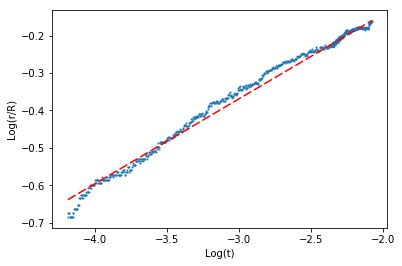

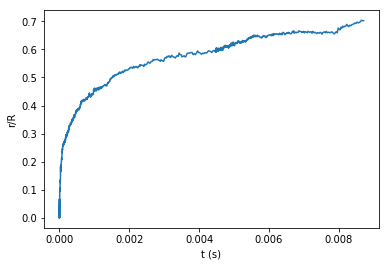

In [49]:
from scipy import stats
a=[]
for i in r_list:
    a.append([i,r_list[i]])
a=np.array(a)
skip=1000
end=-10
logx=np.log10(a[skip:end,0]);logy=np.log10(a[skip:end,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(logx,logy)
x=np.linspace(logx[0],logx[-1],100)
y=slope*x+intercept
plt.figure()
plt.scatter(logx,logy,s=1)
plt.plot(x,y,c='r',dashes=[6, 2])
plt.xlabel('Log(t)')
plt.ylabel('Log(r/R)')
plt.savefig(folder+'1.jpg')
# fig = plt.figure()
# ax =fig.gca()
# ax.scatter(a[:,0] ,a[:,1] , c='blue')
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.figure()
plt.plot(a[:,0],a[:,1])
plt.xlabel('t (s)')
plt.ylabel('r/R')
plt.savefig(folder+'2.jpg')
print(1/slope,slope)
a=[]
for i in r_list:
    a.append([i,r_list[i]])
a=pd.DataFrame(a)
a.to_csv(folder+'time-neck.txt',sep=',')
a=pd.DataFrame([['contact plane','100'],['angle_1',angle1*180/3.14],['angle_2',angle2*180/3.14],['slope',slope]])
a.to_csv(folder+'configuration.txt',sep=',')

In [109]:
#save for coordinate number
position=[];occupy=[]
for i in lattice:
    position.append([i.position[0]*10,i.position[1]*10,i.position[2]*10])
    if len(i.neighbor_list)==0:occupy.append('0');
    if len(i.neighbor_list)==1:occupy.append('1');
    if len(i.neighbor_list)==2:occupy.append('2');
    if len(i.neighbor_list)==3:occupy.append('3');
    if len(i.neighbor_list)==4:occupy.append('4');
    if len(i.neighbor_list)==5:occupy.append('5');
    if len(i.neighbor_list)==6:occupy.append('6');
    if len(i.neighbor_list)==7:occupy.append('7');
    if len(i.neighbor_list)==8:occupy.append('8');
    if len(i.neighbor_list)==9:occupy.append('9');
    if len(i.neighbor_list)==10:occupy.append('10');
    if len(i.neighbor_list)==11:occupy.append('11');
    if len(i.neighbor_list)==12:occupy.append('12');
    if len(i.neighbor_list)>12:occupy.append('13');
a=pd.DataFrame(position)
a.insert(loc=0,column='a',value=occupy)
a.columns=[len(lattice)-1,'','','']
a.iloc[0,:]=['atoms','','','']
a.to_csv('D:/KMC/atoms-.xyz',index=False,sep=' ')